#**Housing Price Predictor Using Linear Regression**

---

**Brief description of all columns in dataset**

* id : A notation for a house

* date: Date house was sold

* price: Price is prediction target

* bedrooms: Number of bedrooms

* bathrooms: Number of bathrooms

* sqft_living: Square footage of the home

* sqft_lot: Square footage of the lot

* floors :Total floors (levels) in house

* waterfront :House which has a view to a waterfront

* view: Has been viewed

* condition :How good the condition is overall

* grade: overall grade given to the housing unit, based on King County grading system

* sqft_above : Square footage of house apart from basement

* sqft_basement: Square footage of the basement

* yr_built : Built Year

* yr_renovated : Year when house was renovated

* zipcode: Zip code

* lat: Latitude coordinate

* long: Longitude coordinate

* sqft_living15 : Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

* sqft_lot15 : LotSize area in 2015(implies-- some renovations)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing all the libraries needed for this project**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.impute import SimpleImputer
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Data Visualization
Reading the CSV file using Pandas

In [ ]:
houses = pd.read_csv('/content/kc_house_data_NaN (1).csv')
houses.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
print("Keys of my dataset",houses.keys())

Keys of my dataset Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [ ]:
print('Rows : ',houses.shape[0],'Columns : ',houses.shape[1])


Rows :  21613 Columns :  22


In [ ]:
houses.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
houses.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


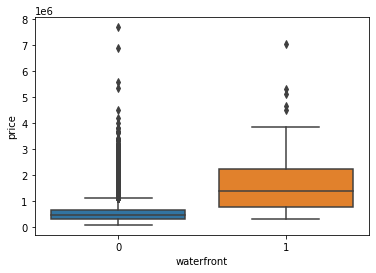

In [ ]:
sns.boxplot(x=houses["waterfront"],y=houses["price"])

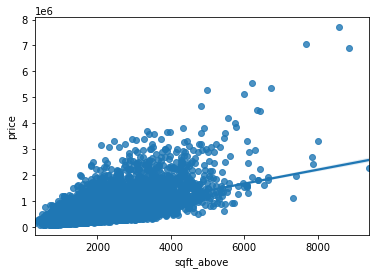

In [ ]:
sns.regplot('sqft_above','price',data=houses)

In [ ]:
houses["floors"].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


#Data Pre-Processing

Replacing missing values (NaN) using mean of particular columns

In [ ]:
houses.isnull().sum()

Unnamed: 0        0
id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [ ]:
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(houses[['bedrooms']])
houses['bedrooms'] = impute.transform(houses[['bedrooms']])

In [ ]:
houses.isnull().sum()

Unnamed: 0        0
id                0
date              0
price             0
bedrooms          0
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [ ]:
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(houses[['bathrooms']])
houses['bathrooms'] = impute.transform(houses[['bathrooms']])

In [ ]:
houses.isnull().sum()

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
houses['bedrooms']

0        3.0
1        3.0
2        2.0
3        4.0
4        3.0
        ... 
21608    3.0
21609    4.0
21610    2.0
21611    3.0
21612    2.0
Name: bedrooms, Length: 21613, dtype: float64

In [ ]:
houses.drop(["Unnamed: 0","id"],axis=1,inplace=True) #Dropping the unnamed column


In [ ]:
houses.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**All columns Correlation with Price (Prediction Target)**

In [ ]:
houses.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

**All columns Correlation with each other**

In [ ]:
houses_corr = houses.corr() 
houses_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308797,0.525738,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308797,1.000000,0.514194,0.578077,0.032307,0.178022,-0.006800,0.080058,0.026690,0.356589,0.479286,0.302856,0.155749,0.018456,-0.153736,-0.009735,0.130978,0.393356,0.030430
bathrooms,0.525738,0.514194,1.000000,0.755371,0.087929,0.502132,0.063744,0.188341,-0.126197,0.664676,0.686309,0.283428,0.506913,0.050560,-0.204819,0.024246,0.224922,0.569467,0.087539
sqft_living,0.702035,0.578077,0.755371,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.032307,0.087929,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.178022,0.502132,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006800,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.080058,0.188341,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.026690,-0.126197,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356589,0.664676,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


**Heatmap**

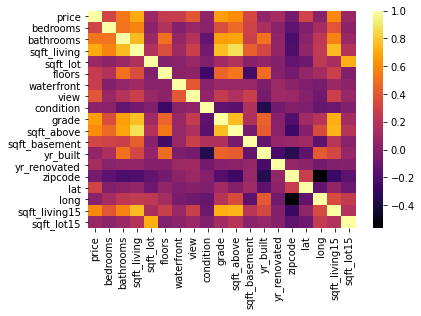

In [ ]:
sns.heatmap(houses_corr, cmap = 'inferno')

In [ ]:
houses.drop(["long","yr_built"],axis=1,inplace=True)  #Very low corelation

In [ ]:
houses

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,98178,47.5112,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,98125,47.7210,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,0,98028,47.7379,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,98136,47.5208,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,98074,47.6168,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,0,98103,47.6993,1530,1509
21609,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,0,98146,47.5107,1830,7200
21610,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,0,98144,47.5944,1020,2007
21611,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,0,98027,47.5345,1410,1287


In [ ]:
print("Keys of my dataset",houses.keys())

Keys of my dataset Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')


#Model Evaluation & Refinement

**Training and Testing split**


In [ ]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = houses[features]
Y = houses['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 5404
number of training samples: 16209


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() #For lowering the variance by bringing them in between 0 and 1

scaler.fit(x_train)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
x_train = scaler.transform(x_train)

In [ ]:
print(x_train.min(axis=0))


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
print(x_train.max(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
x_test = scaler.transform(x_test)

**Linear Regression**

In [ ]:
lm = LinearRegression()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)

0.6619010313713616

In [ ]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

**Pipeline**

In [ ]:
pipe=Pipeline(Input)
pipe.fit(x_train,y_train)
pipe.score(x_train,y_train)

0.7458159815546208

**Prediction using Linear Regression**

In [ ]:
y_pred = lm.predict(x_test)
y_pred

array([650528.23407145, 513271.33233042, 804911.17610854, ...,
       796991.00188583,   7295.99636   , 497062.80329329])

**Prediction using Pipeline**

In [ ]:
y_pred_pipe=pipe.predict(x_test)
y_pred_pipe

array([586915. , 452255.5, 582801. , ..., 729546. ,  41281. , 489231. ])

**Actual & Predicted test data using Linear Regression**

In [ ]:
acc = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
acc

,Actual,Predicted
15544,459000.0,650528.234071
17454,445000.0,513271.332330
21548,1057000.0,804911.176109
3427,732350.0,705270.445157
8809,235000.0,218946.125635
...,...,...
12416,680000.0,590850.992546
8253,267500.0,194048.978888
4251,725000.0,796991.001886
11404,253500.0,7295.996360


**Actual & Predicted test data using Pipeline**

In [ ]:
acc2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_pipe})
acc2

,Actual,Predicted
15544,459000.0,586915.0
17454,445000.0,452255.5
21548,1057000.0,582801.0
3427,732350.0,689389.0
8809,235000.0,349300.0
...,...,...
12416,680000.0,560510.0
8253,267500.0,289937.0
4251,725000.0,729546.0
11404,253500.0,41281.0


#Graph of Actual value Vs Prediction

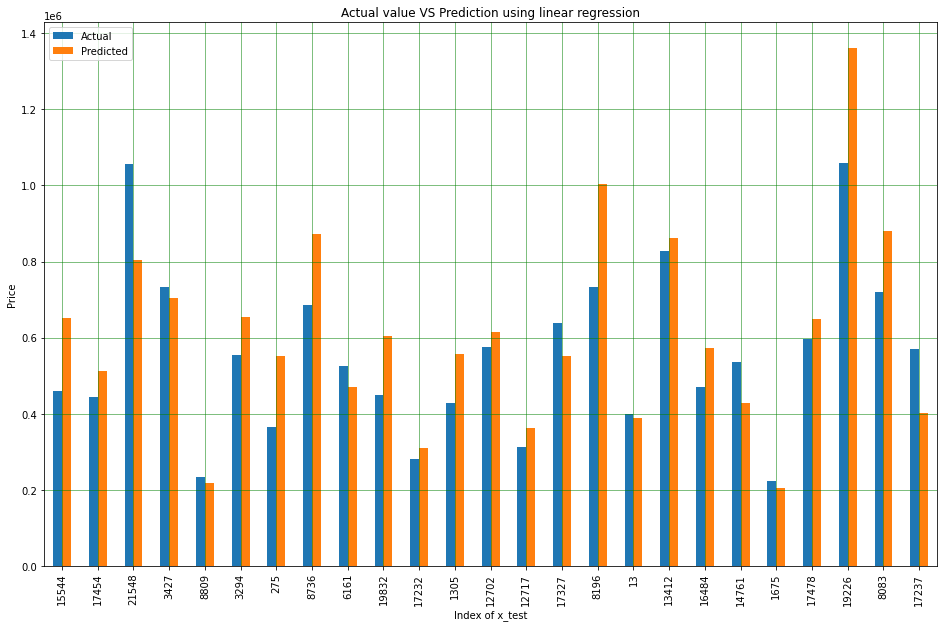

In [ ]:
df1 = acc.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Actual value VS Prediction using linear regression")
plt.xlabel("Index of x_test")
plt.ylabel("Price")
plt.show()


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 136892.95029791
Mean Squared Error: 56653207811.85638
Root Mean Squared Error: 238019.34335649357


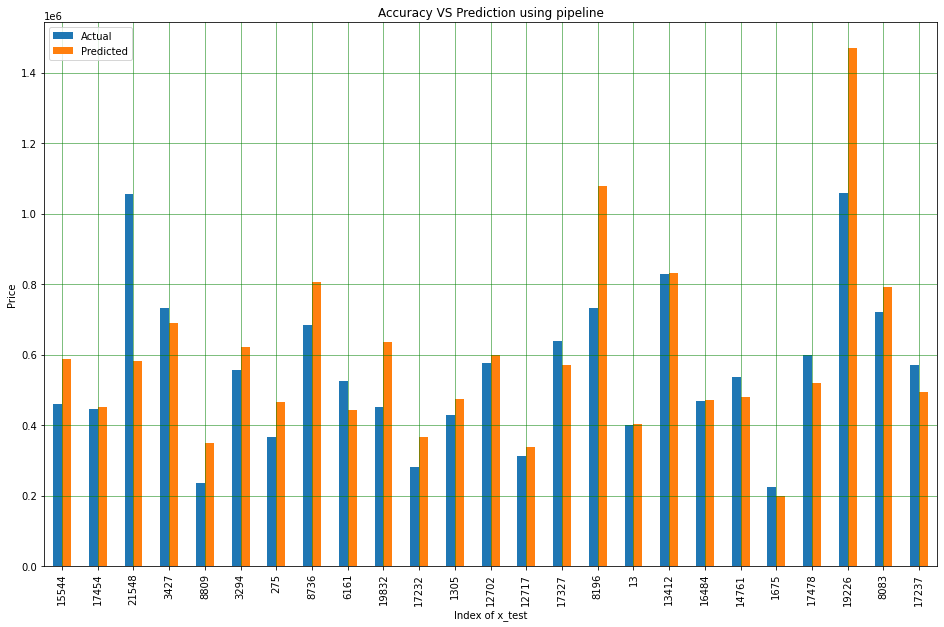

In [ ]:
df1 = acc2.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Accuracy VS Prediction using pipeline")
plt.xlabel("Index of x_test")
plt.ylabel("Price")
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_pipe))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_pipe))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_pipe)))

Mean Absolute Error: 117705.79357883049
Mean Squared Error: 39055476086.96119
Root Mean Squared Error: 197624.5837110383
